# Aggregated returns distribution

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from scipy.special import gamma, kv  # modified Bessel function of the second kind of real order v

import ipywidgets as widgets
from ipywidgets import interact

### Load data

In [2]:
daily_returns = pd.read_csv('DailyReturns-Aktien-datamatrix.csv', header=None)

The daily returns has the companies in the rows and the returns data in the columns.

In [3]:
daily_returns.shape

(352, 4851)

To change the companies to the columns and the returns values to the rows we use the transpose.

In [4]:
daily_returns_T = daily_returns.T
daily_returns_T.shape

(4851, 352)

### Useful functions

In [5]:
def k_distribution(returns, N, alpha):
    '''Computes the one dimensional K-distribution with parameters
       N and alpha
    '''
    
    first_part = (((np.sqrt(2)) ** (1 - N)) / (np.sqrt(np.pi) * gamma(N / 2))) \
                 * (np.sqrt(N / alpha)) ** (N / 2 + 0.5) * (np.abs(returns)) ** (N/2 - 0.5)
    
    second_part = kv(N / 2 - 0.5, np.abs(returns) * np.sqrt(N / alpha))
    
    dist = first_part * second_part
    
    return dist

In [6]:
def rotate_and_scale(returns):
    '''Rotates the returns in the eigenbasis of the covariance matrix
       and normalizes them to standard deviation 1. The returns array must
       have a TxK dimension, and K must be smaller than T.
    '''
    
    cov = returns.cov()
    
    eig_val, eig_vec = np.linalg.eig(cov)
    
    rot, scale = eig_vec, np.diag(1 / np.sqrt(eig_val))
    
    trans = rot.dot(scale)
    
    return returns.dot(trans)

## Computation

In [7]:
rr = np.arange(-8, 9, 0.11)
bessel = k_distribution(rr, 3.2, 1)

In [8]:
rot_returns = rotate_and_scale(daily_returns_T)

In [9]:
rot_returns.shape

(4851, 352)

In [10]:
rot_returns[0].std()

0.9999999999999994

Aggregation of all the returns

In [11]:
one_col = []

for col in rot_returns.columns:
    one_col.append(rot_returns[col])
    
agg = pd.concat(one_col, ignore_index=True)

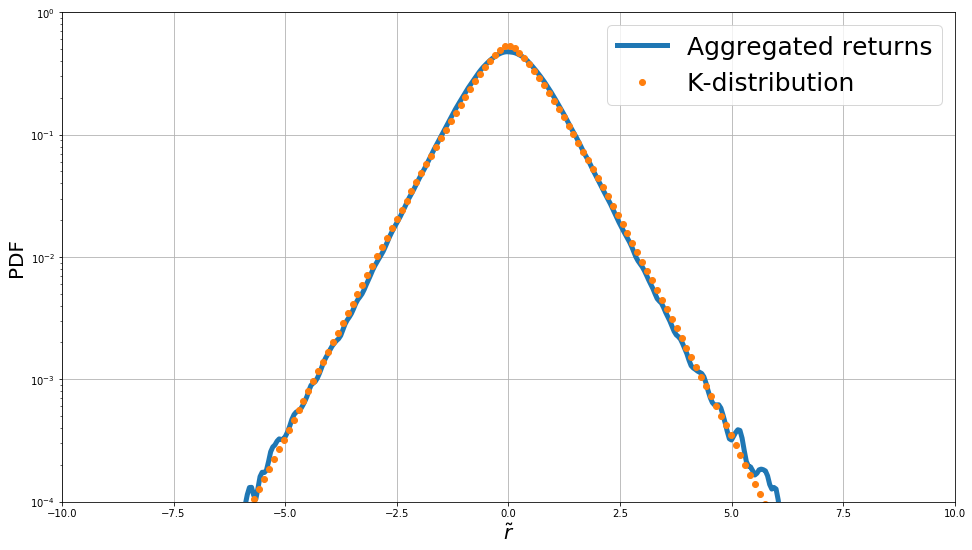

In [12]:
agg.plot(kind='density', figsize=(16, 9), logy=True, label='Aggregated returns', legend=True, lw=5)
plt.plot(rr, bessel, 'o', label='K-distribution')
plt.legend(fontsize=25)
plt.xlim(-10, 10)
plt.ylim(10 ** -4, 1)
plt.xlabel(r'$\tilde{r}$', fontsize=20)
plt.ylabel('PDF', fontsize=20)
plt.grid(True)

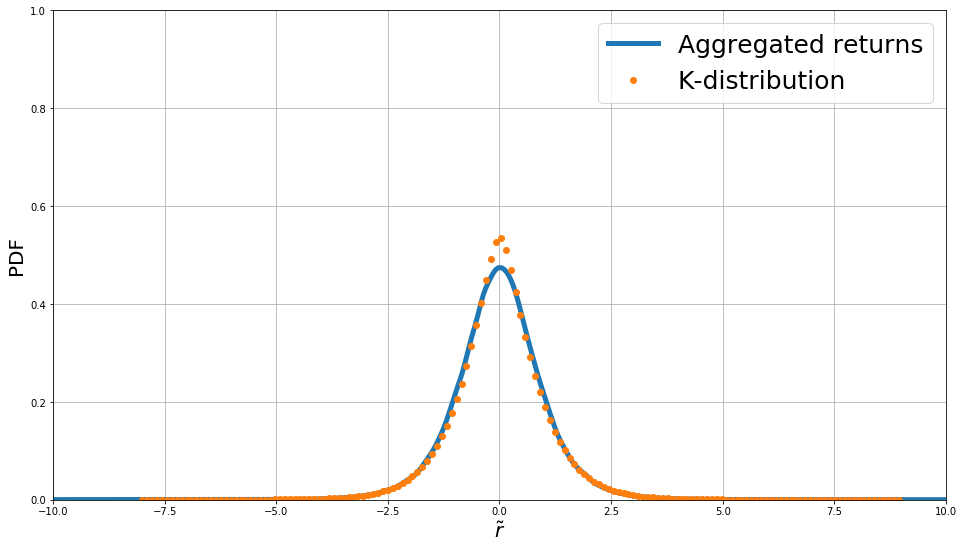

In [13]:
agg[::8].plot(kind='density', figsize=(16, 9), label='Aggregated returns', legend=True, lw=5)
plt.plot(rr, bessel, 'o', label='K-distribution')
plt.legend(fontsize=25)
plt.xlim(-10, 10)
plt.ylim(10 ** -4, 1)
plt.xlabel(r'$\tilde{r}$', fontsize=20)
plt.ylabel('PDF', fontsize=20)
plt.grid(True)

In [14]:
@interact(i=(1, 20, 0.1))
def interactive_k_distribution(i):

    
    agg[::8].plot(kind='density', figsize=(16, 9), label='Aggregated returns', legend=True, lw=5)
    plt.plot(rr, k_distribution(rr, i, 1), 'o', label='K-distribution')
    plt.legend(fontsize=25)
    plt.xlim(-10, 10)
    plt.ylim(10 ** -4, 1)
    plt.xlabel(r'$\tilde{r}$', fontsize=20)
    plt.ylabel('PDF', fontsize=20)
    plt.grid(True)
    
    return None

interactive(children=(FloatSlider(value=10.0, description='i', max=20.0, min=1.0), Output()), _dom_classes=('w…

### Check operations in rotate_and_scale function

In [15]:
cov = daily_returns_T.cov()
cov.shape

(352, 352)

In [16]:
eig_val, eig_vec = np.linalg.eig(cov)
print(eig_val.shape)
print(eig_vec.shape)

(352,)
(352, 352)


In [17]:
rot, scale = eig_vec, np.diag(1 / np.sqrt(eig_val))
print(rot.shape)
print(scale.shape)

(352, 352)
(352, 352)


In [18]:
trans = rot.dot(scale)
trans.shape

(352, 352)

In [19]:
daily_returns_T.dot(trans)

,0,1,2,3,4,5,6,7,8,9,...,342,343,344,345,346,347,348,349,350,351
0,-0.139463,0.131148,-0.065896,-0.557259,0.648759,-0.446396,-0.280311,0.139332,-0.311343,0.341929,...,1.812847,0.255213,-0.034601,0.467647,-0.787966,-0.177777,-0.443662,0.357986,0.672477,-0.006818
1,0.130519,-0.523999,-0.533188,0.080207,0.407482,0.924115,-0.887710,-0.409805,0.242005,-0.601377,...,1.441982,-1.210385,1.095213,0.993805,1.080280,0.582044,-0.445838,-0.892698,0.369005,-1.485970
2,-0.543544,-0.487678,-0.410257,-0.677041,0.674555,-0.084498,-1.005910,1.188505,0.184292,0.350267,...,-0.823241,0.570321,0.471988,0.923678,0.722716,2.137787,1.720872,-1.390099,-0.939114,-1.699082
3,-0.848844,-0.823597,-0.785047,-0.527748,0.499856,-0.736688,-1.024233,0.328512,-0.480483,0.107309,...,-0.592547,-0.560821,0.859337,-0.559137,-0.956495,0.428386,0.839887,0.249619,1.024082,-0.498748
4,-0.773622,-0.532562,-0.370892,-0.631730,0.065420,0.558156,-0.014533,0.238190,0.733727,0.127941,...,-0.164945,-0.125668,-0.193519,0.068468,-1.045079,0.890359,-2.155783,-0.608755,-1.056620,-0.672512
5,0.554247,1.068440,-0.344587,-0.095352,0.149963,-0.418913,-0.981869,-0.756908,-1.101202,-0.218526,...,-0.193369,-0.501554,-2.341864,-0.596259,-0.895247,0.706059,-0.423602,-0.951640,0.690334,-1.369987
6,-0.978969,-1.812057,-0.099349,-0.890668,0.967563,-1.851095,-1.557217,0.628080,-0.735833,-0.350528,...,1.582823,-0.921321,-0.626920,1.179478,0.414433,0.157474,-1.478569,1.681431,0.083313,-2.123030
7,-0.861665,1.137622,0.281270,-1.224691,0.183510,-0.154776,0.382871,-0.143248,0.468997,0.489740,...,2.455408,-0.667077,-0.544750,0.414402,-0.308623,-1.785541,1.655088,-0.244599,-0.928699,-0.616793
8,0.775048,1.499755,-0.281019,0.409201,-1.064216,-0.181022,-0.095619,-0.190824,-0.108020,-1.421809,...,-1.528508,0.378959,1.213789,-0.281157,2.238024,1.131871,0.272337,1.812630,-0.208191,0.178290
9,0.048716,1.072434,0.066539,0.054302,0.074380,-0.913882,-0.231250,0.385929,-0.870208,0.026280,...,-0.382448,1.858709,2.765528,-1.423388,0.192969,-1.658464,-1.302513,-0.762295,-1.453198,1.796751
